In [1]:
import pandas as pd
import numpy as np 
import json
import csv


import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm_notebook as tqdm

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('averaged_perceptron_tagger')

import spacy
import math

import string
import sys
import random

from collections import Counter

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aarunku5/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
wino_l_list = []
pandas_json_attempt = []
with open('./data/snli_1.0_train.jsonl') as wino_file_pointer:
#     pandas_json_attempt = pd.read_json(wino_file_pointer)
#     json_attemp = json.loads(wino_file_pointer)
    for item in wino_file_pointer:
        wino_l_list.append(item)
    

In [3]:
data = []
for item in wino_l_list:
    data.append(json.loads(item))

In [4]:
df_wino = pd.DataFrame.from_dict(data)

In [5]:
df_wino

annotator_labels         captionID     gold_label               pairID  \
0             [neutral]  3416050480.jpg#4        neutral  3416050480.jpg#4r1n   
1       [contradiction]  3416050480.jpg#4  contradiction  3416050480.jpg#4r1c   
2          [entailment]  3416050480.jpg#4     entailment  3416050480.jpg#4r1e   
3             [neutral]  2267923837.jpg#2        neutral  2267923837.jpg#2r1n   
4          [entailment]  2267923837.jpg#2     entailment  2267923837.jpg#2r1e   
...                 ...               ...            ...                  ...   
550147  [contradiction]  2267923837.jpg#3  contradiction  2267923837.jpg#3r1c   
550148        [neutral]  2267923837.jpg#3        neutral  2267923837.jpg#3r1n   
550149        [neutral]  7979219683.jpg#2        neutral  7979219683.jpg#2r1n   
550150  [contradiction]  7979219683.jpg#2  contradiction  7979219683.jpg#2r1c   
550151     [entailment]  7979219683.jpg#2     entailment  7979219683.jpg#2r1e   

                                                sentence1  \
0       A person on a horse jumps over a broken down a...   
1       A person on a horse jumps over a broken down a...   
2       A person on a horse jumps over a broken down a...   
3                   Children smiling and waving at camera   
4                   Children smiling and waving at camera   
...                                                   ...   
550147                Four dirty and barefooted children.   
550148                Four dirty and barefooted children.   
550149  A man is surfing in a bodysuit in beautiful bl...   
550150  A man is surfing in a bodysuit in beautiful bl...   
550151  A man is surfing in a bodysuit in beautiful bl...   

                                   sentence1_binary_parse  \
0       ( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...   
1       ( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...   
2       ( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...   
3       ( Children ( ( ( smiling and ) waving ) ( at c...   
4       ( Children ( ( ( smiling and ) waving ) ( at c...   
...                                                   ...   
550147  ( ( ( ( Four dirty ) and ) ( barefooted childr...   
550148  ( ( ( ( Four dirty ) and ) ( barefooted childr...   
550149  ( ( A man ) ( ( is ( surfing ( in ( ( a bodysu...   
550150  ( ( A man ) ( ( is ( surfing ( in ( ( a bodysu...   
550151  ( ( A man ) ( ( is ( surfing ( in ( ( a bodysu...   

                                          sentence1_parse  \
0       (ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...   
1       (ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...   
2       (ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...   
3       (ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...   
4       (ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...   
...                                                   ...   
550147  (ROOT (NP (NP (CD Four) (NNS dirty)) (CC and) ...   
550148  (ROOT (NP (NP (CD Four) (NNS dirty)) (CC and) ...   
550149  (ROOT (S (NP (DT A) (NN man)) (VP (VBZ is) (VP...   
550150  (ROOT (S (NP (DT A) (NN man)) (VP (VBZ is) (VP...   
550151  (ROOT (S (NP (DT A) (NN man)) (VP (VBZ is) (VP...   

                                                sentence2  \
0       A person is training his horse for a competition.   
1           A person is at a diner, ordering an omelette.   
2                       A person is outdoors, on a horse.   
3                       They are smiling at their parents   
4                              There are children present   
...                                                   ...   
550147           four kids won awards for 'cleanest feet'   
550148  four homeless children had their shoes stolen,...   
550149  A man in a bodysuit is competing in a surfing ...   
550150  A man in a business suit is heading to a board...   
550151  On the beautiful blue water there is a man in ...   

                                   sentence2_binary_parse  \
0       ( ( A person ) ( ( is ( ( trainin

In [6]:
nlp = spacy.load("en_trf_bertbaseuncased_lg")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

In [7]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [8]:
# diction = {}

In [9]:
# counter = 0
# for sentence in df_wino['sentence']:
#     diction[sentence] = nlp(sentence)
#     print(counter," ")
#     counter=counter+1

In [10]:
# for key in diction:
#     print(diction[key].ents)
#     for item in diction[key].ents:
#         print((item.text,item.label_))

In [11]:
# entities_dict = {}
# for key in diction:
#     for item in diction[key].ents:
#         if item.label_ != 'PERSON':
#             if key in entities_dict:
#                 entities_dict[key].append(item.text)
#             else:
#                 entities_dict[key] = [item.text]

In [12]:
# entities_dict_copy = entities_dict.copy()
# for key in entities_dict:
#     if entities_dict_copy[key] == ['_']:
#         del entities_dict_copy[key]


In [13]:
# diction

In [8]:
def get_str_matrix(str_list):
    similarity_matrix = []
    for str_temp_1 in str_list:
        str_temp_1_doc = nlp(str_temp_1)
        temp = []
        for str_temp_2 in str_list:
            str_temp_2_doc = nlp(str_temp_2)
            temp.append(str_temp_1_doc.similarity(str_temp_2_doc))
        similarity_matrix.append(temp)
    return similarity_matrix

In [9]:
def partition(lst, n):
    division = len(lst) / n
    return [lst[round(division * i):round(division * (i + 1))] for i in range(n)]

In [16]:
# for lst in partition(df_wino['sentence'],20):
#     similarity_matrix = get_str_matrix(lst)
    
#     from mpl_toolkits.axes_grid1 import make_axes_locatable

#     fig, ax = plt.subplots(figsize=(20,20))
#     im = ax.matshow(similarity_matrix, interpolation='nearest')
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)
#     cax.tick_params(labelsize=60)
#     fig.colorbar(im,cax)
#     ax.grid(True)
#     plt.show()

In [17]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable

# fig, ax = plt.subplots(figsize=(20,20))
# im = ax.matshow(similarity_matrix, interpolation='nearest')
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# cax.tick_params(labelsize=60)
# fig.colorbar(im,cax)
# ax.grid(True)
# plt.show()

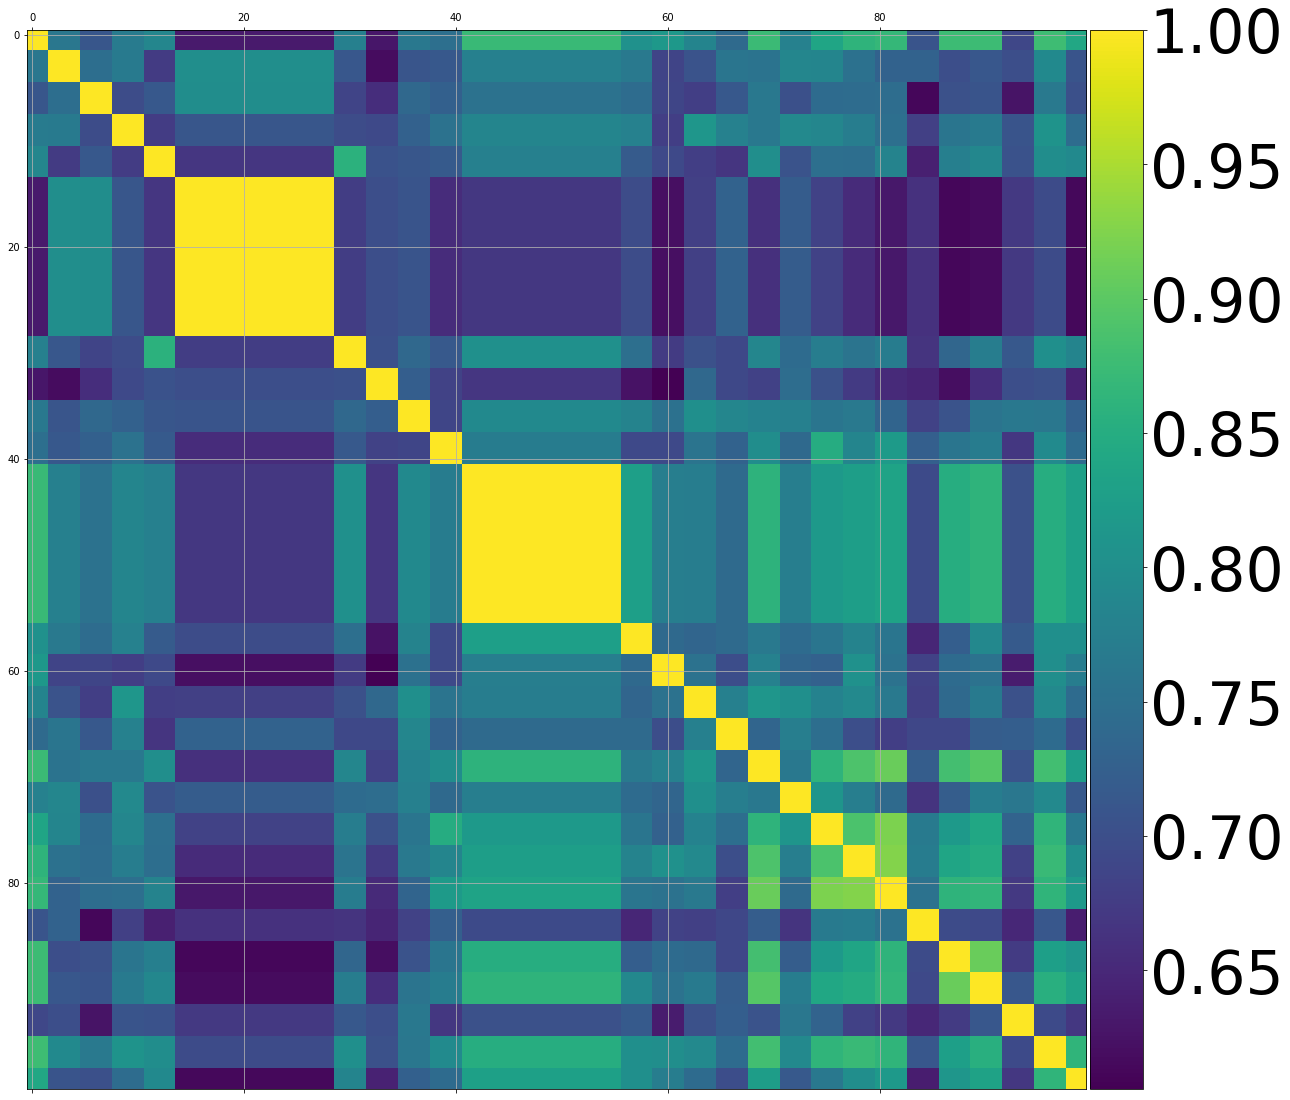

In [10]:
similarity_matrix = get_str_matrix(df_wino['sentence1'][1000:1100])
    
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(20,20))
im = ax.matshow(similarity_matrix, interpolation='nearest')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cax.tick_params(labelsize=60)
fig.colorbar(im,cax)
ax.grid(True)
plt.show()

In [11]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
def get_cosine_sim(*strs): 
    vectors = [t for t in get_vectors(*strs)]
    return cosine_similarity(vectors)
    
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [12]:
df_trunc=pd.DataFrame()
df_trunc=df_wino.head(30000)
df_trunc


annotator_labels         captionID     gold_label               pairID  \
0            [neutral]  3416050480.jpg#4        neutral  3416050480.jpg#4r1n   
1      [contradiction]  3416050480.jpg#4  contradiction  3416050480.jpg#4r1c   
2         [entailment]  3416050480.jpg#4     entailment  3416050480.jpg#4r1e   
3            [neutral]  2267923837.jpg#2        neutral  2267923837.jpg#2r1n   
4         [entailment]  2267923837.jpg#2     entailment  2267923837.jpg#2r1e   
...                ...               ...            ...                  ...   
29995     [entailment]  5735645786.jpg#4     entailment  5735645786.jpg#4r3e   
29996     [entailment]  5735645786.jpg#4     entailment  5735645786.jpg#4r5e   
29997  [contradiction]  5735645786.jpg#4  contradiction  5735645786.jpg#4r4c   
29998        [neutral]  5735645786.jpg#4        neutral  5735645786.jpg#4r4n   
29999  [contradiction]  5735645786.jpg#4  contradiction  5735645786.jpg#4r1c   

                                               sentence1  \
0      A person on a horse jumps over a broken down a...   
1      A person on a horse jumps over a broken down a...   
2      A person on a horse jumps over a broken down a...   
3                  Children smiling and waving at camera   
4                  Children smiling and waving at camera   
...                                                  ...   
29995     Two officers sit on horses in a urban setting.   
29996     Two officers sit on horses in a urban setting.   
29997     Two officers sit on horses in a urban setting.   
29998     Two officers sit on horses in a urban setting.   
29999     Two officers sit on horses in a urban setting.   

                                  sentence1_binary_parse  \
0      ( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...   
1      ( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...   
2      ( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...   
3      ( Children ( ( ( smiling and ) waving ) ( at c...   
4      ( Children ( ( ( smiling and ) waving ) ( at c...   
...                                                  ...   
29995  ( ( Two officers ) ( ( sit ( on ( horses ( in ...   
29996  ( ( Two officers ) ( ( sit ( on ( horses ( in ...   
29997  ( ( Two officers ) ( ( sit ( on ( horses ( in ...   
29998  ( ( Two officers ) ( ( sit ( on ( horses ( in ...   
29999  ( ( Two officers ) ( ( sit ( on ( horses ( in ...   

                                         sentence1_parse  \
0      (ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...   
1      (ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...   
2      (ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...   
3      (ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...   
4      (ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...   
...                                                  ...   
29995  (ROOT (S (NP (CD Two) (NNS officers)) (VP (VBP...   
29996  (ROOT (S (NP (CD Two) (NNS officers)) (VP (VBP...   
29997  (ROOT (S (NP (CD Two) (NNS officers)) (VP (VBP...   
29998  (ROOT (S (NP (CD Two) (NNS officers)) (VP (VBP...   
29999  (ROOT (S (NP (CD Two) (NNS officers)) (VP (VBP...   

                                               sentence2  \
0      A person is training his horse for a competition.   
1          A person is at a diner, ordering an omelette.   
2                      A person is outdoors, on a horse.   
3                      They are smiling at their parents   
4                             There are children present   
...                                                  ...   
29995                            There are two officers.   
29996                         two people sit atop horses   
29997                      Two officers sit in there car   
29998                            Two officers patrolling   
29999  Two officers are walking their horses in the p...   

                                  sentence2_binary_parse  \
0      ( ( A person ) ( ( is ( ( training ( his horse...   
1      ( ( A person ) ( ( ( ( is ( at ( a

In [13]:
similarity_Matrix = get_cosine_sim(*df_trunc['sentence1'])    

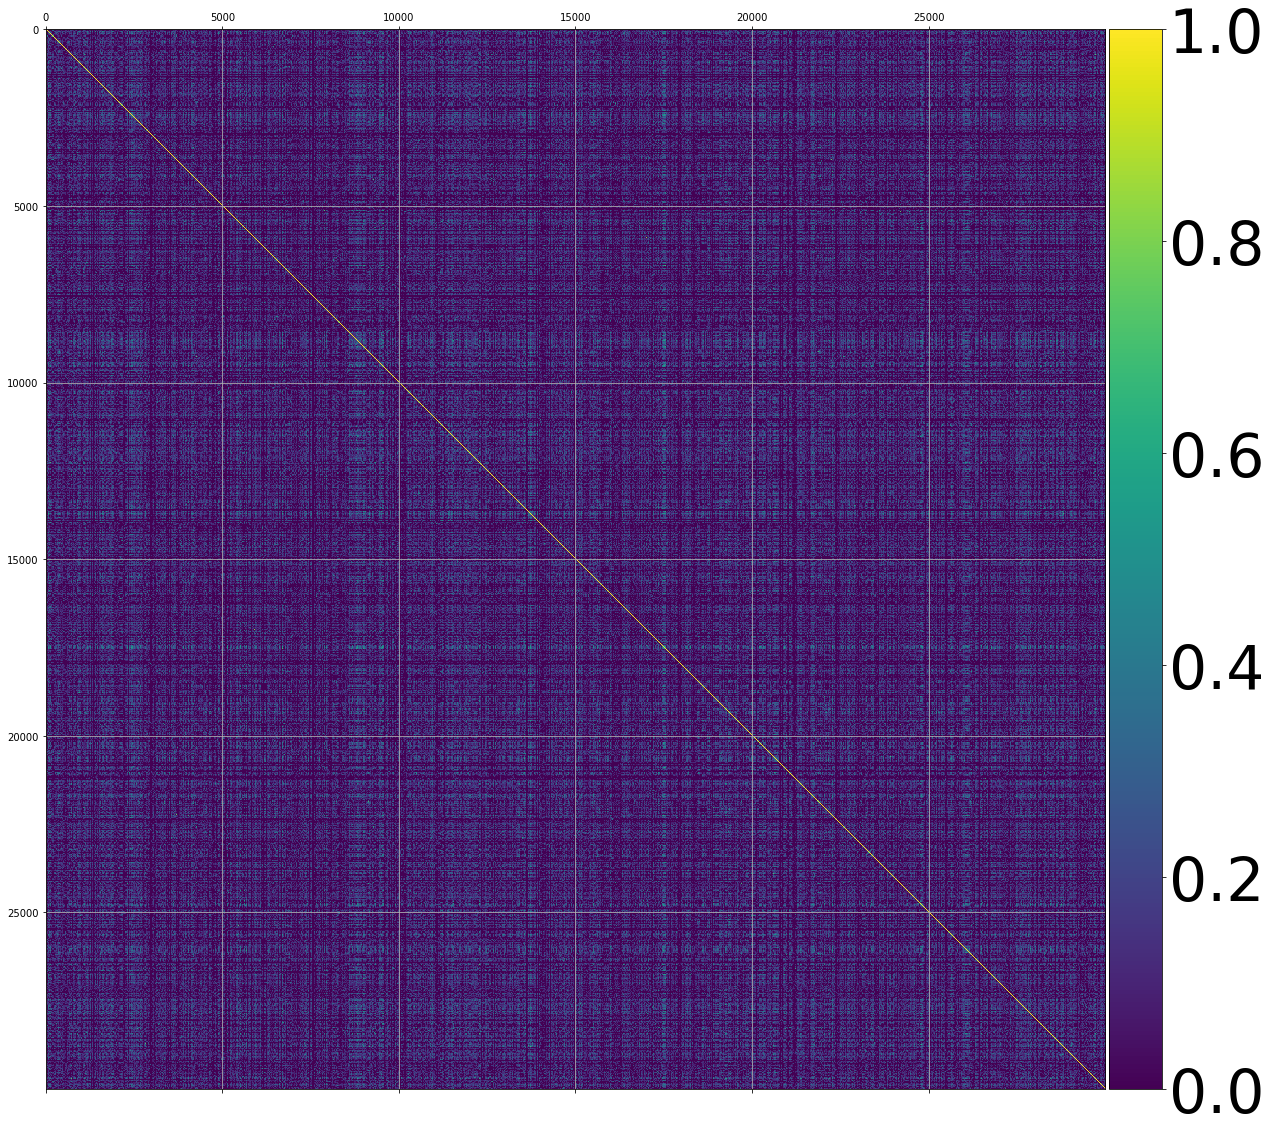

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(20,20))
im = ax.matshow(similarity_Matrix, interpolation='nearest')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cax.tick_params(labelsize=60)
fig.colorbar(im,cax)
ax.grid(True)
plt.show()

In [20]:
threshold = lambda x : 1 if x > 0.5 else 0

In [21]:
vectorized_thresholder = np.vectorize(threshold)

In [11]:
similarity_Matrix_vectorized = vectorized_thresholder(similarity_Matrix)

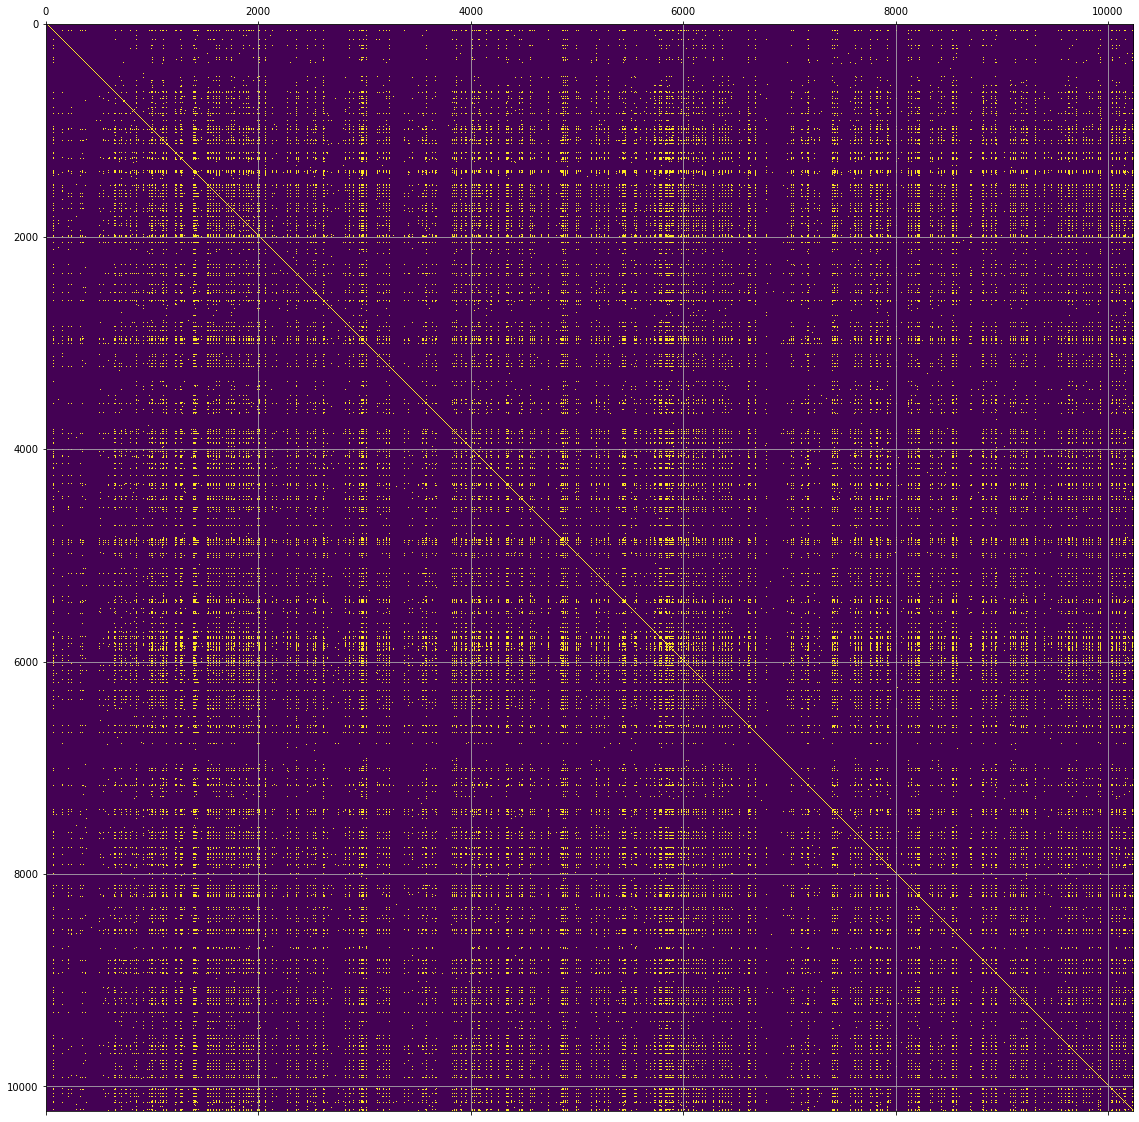

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(similarity_Matrix_vectorized, interpolation='nearest')
ax.grid(True)
plt.show()

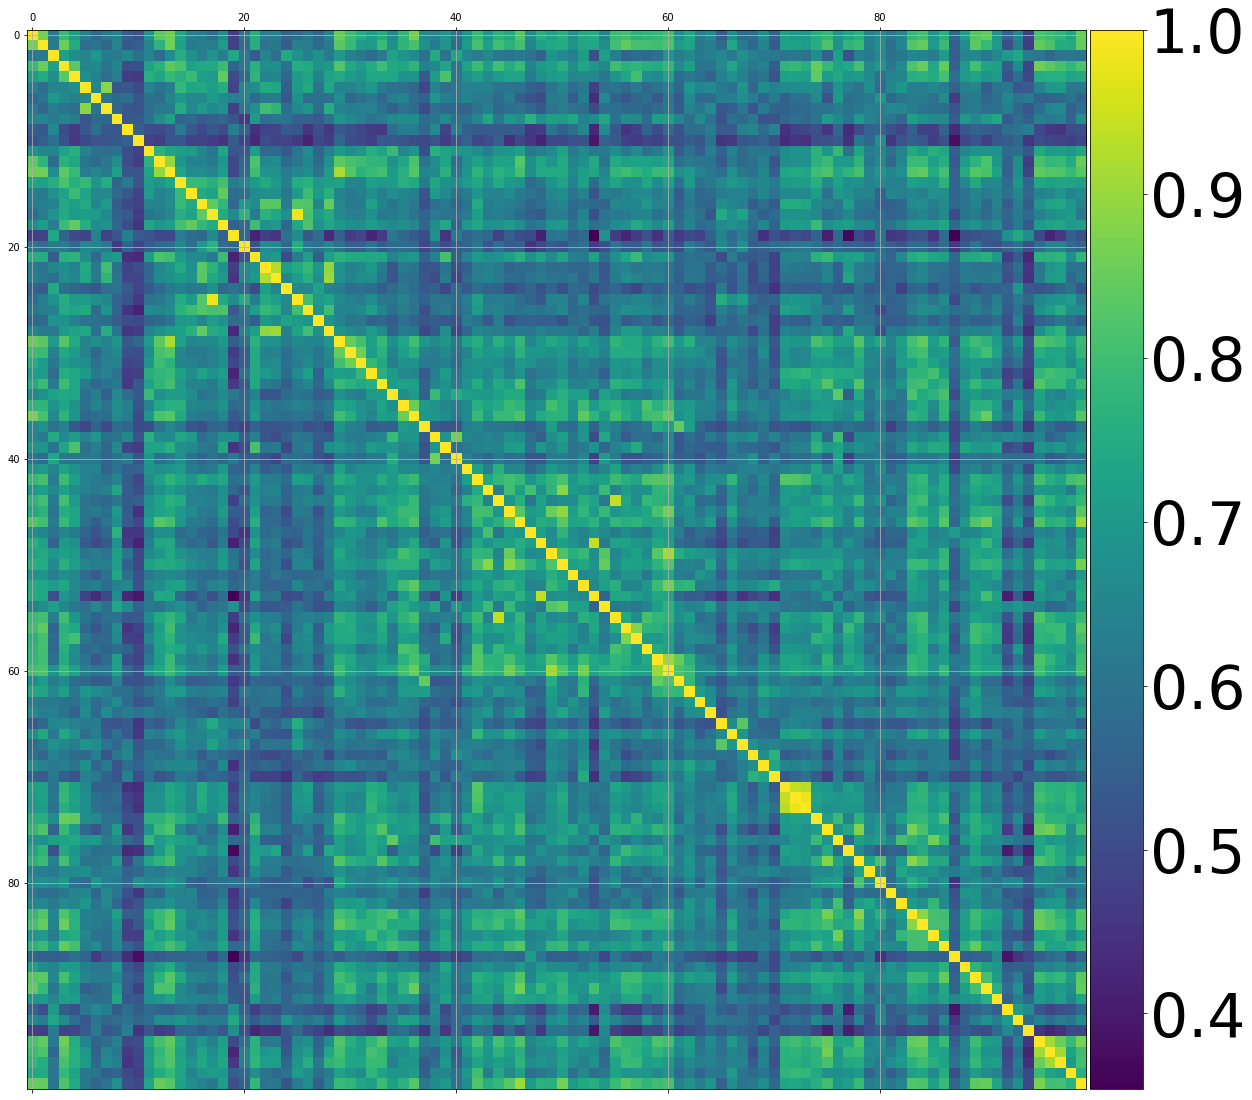

In [15]:
similarity_matrix = get_str_matrix(df_wino['sentence2'][1000:1100])
    
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(20,20))
im = ax.matshow(similarity_matrix, interpolation='nearest')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cax.tick_params(labelsize=60)
fig.colorbar(im,cax)
ax.grid(True)
plt.show()

In [16]:
similarity_Matrix = get_cosine_sim(*df_trunc['sentence2'])    

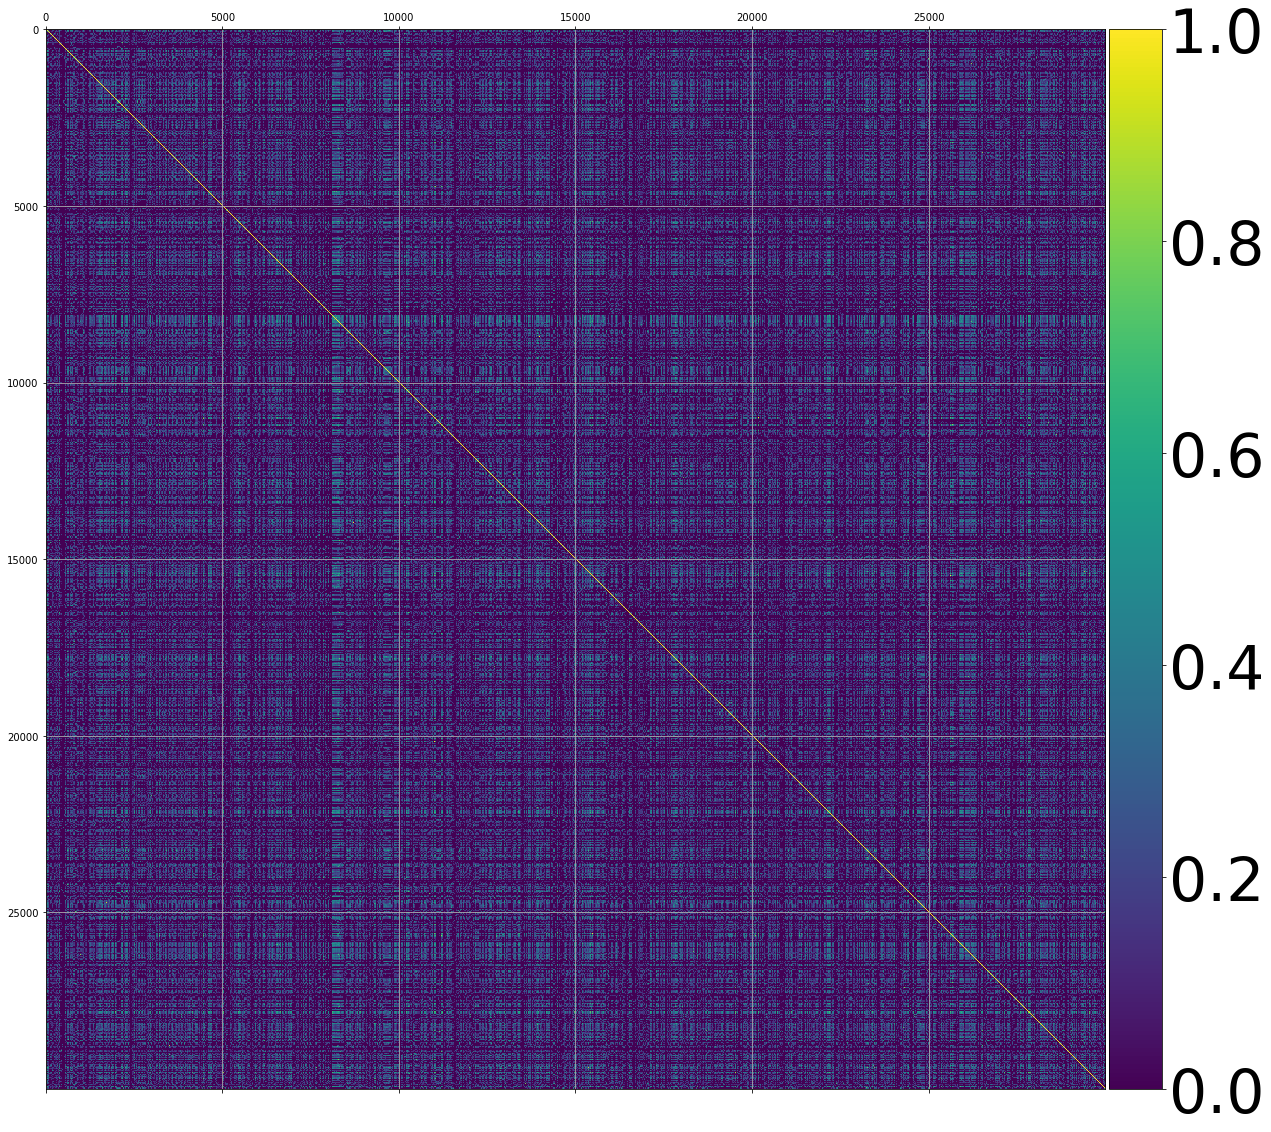

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(20,20))
im = ax.matshow(similarity_Matrix, interpolation='nearest')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cax.tick_params(labelsize=60)
fig.colorbar(im,cax)
ax.grid(True)
plt.show()

In [22]:
similarity_Matrix_vectorized = vectorized_thresholder(similarity_Matrix)

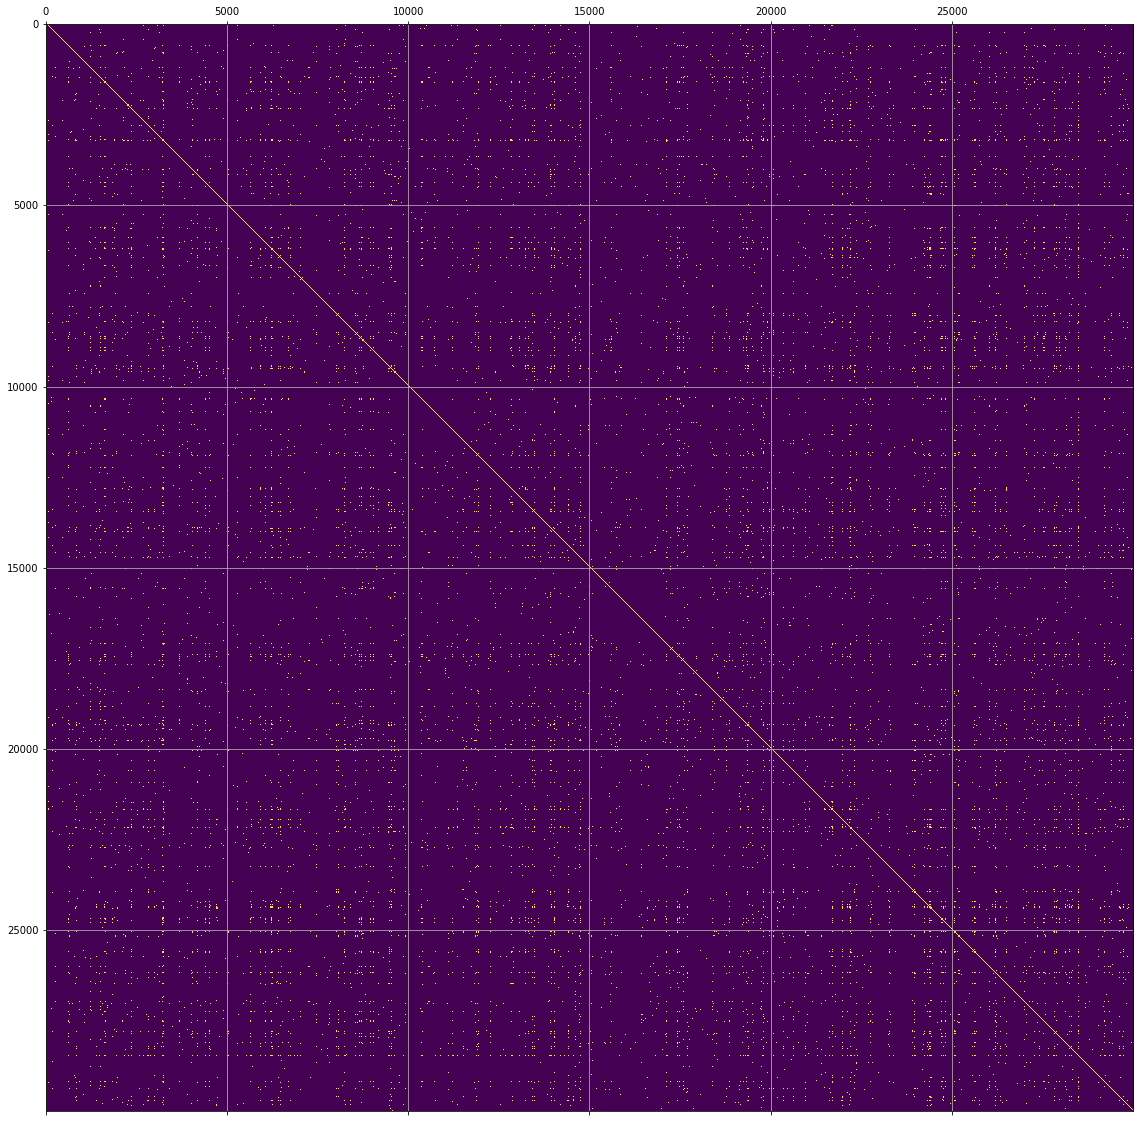

In [23]:
fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(similarity_Matrix_vectorized, interpolation='nearest')
ax.grid(True)
plt.show()

In [24]:
def partsOfSpeechDivided(phrase):
    word_tokens = word_tokenize(phrase)
    word_tokens = [word for word in word_tokens if word not in list(string.punctuation)]
    word_tokens = [ word for word in word_tokens if not word in stop_words and not isfloat(word) ]
    word_tokens = [ lemmatizer.lemmatize(word) for word in word_tokens ]
    tagged = nltk.pos_tag(word_tokens)
    tagged_reduced_adjective = set()
    tagged_reduced_verbs = set()
    tagged_reduced_adverbs = set()
    tagged_reduced_nouns = set()
    #print(tagged)
    for speech_tag in tagged:
        if speech_tag[1] in ['JJ','JJR','JJS']:
            tagged_reduced_adjective.add(speech_tag[0])
        elif speech_tag[1] in ['RB','RBR','RBS']:
            tagged_reduced_adverbs.add(speech_tag[0])
        elif speech_tag[1] in ['VB','VBD','VBG','VBN','VBP','VBZ']:
            tagged_reduced_verbs.add(speech_tag[0])
        elif speech_tag[1] in ['NN','NNS','NNP','NNPS']:
            tagged_reduced_nouns.add(speech_tag[0])
    #print(tagged_reduced_verbs)
    #print(tagged_reduced_nouns)
    return tagged_reduced_verbs, tagged_reduced_nouns, tagged_reduced_adjective, tagged_reduced_adverbs



In [25]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

In [35]:
pos_labels = ['Verbs','Nouns','Adjectives','Adverbs']

parts_of_speech = {}

for element in pos_labels:
    if element not in parts_of_speech.keys():
        parts_of_speech[element]=[]
    
for item in df_wino['sentence1']:
    temp = {}
    temp['Verbs'], temp['Nouns'],\
    temp['Adjectives'], temp['Adverbs'] = \
    partsOfSpeechDivided(item)
    for element in temp['Verbs']:
        parts_of_speech['Verbs'].append(element)
    for element in temp['Nouns']:
        parts_of_speech['Nouns'].append(element)
    for element in temp['Adjectives']:
        parts_of_speech['Adjectives'].append(element)
    for element in temp['Adverbs']:
        parts_of_speech['Adverbs'].append(element)


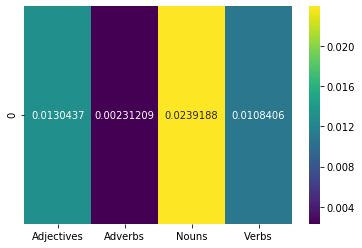

In [37]:
heatmap_dataframe = pd.DataFrame()
heatmap_dataframe = heatmap_dataframe.append(parts_of_speech, ignore_index=True)
# can add the test as well as the dev files directly here see later
heatmap_dataframe
heatmap_dataframe = heatmap_dataframe.applymap(set)
heatmap_dataframe_lengths = heatmap_dataframe.applymap(len)
heatmap_dataframe_lengths.loc[0,:]= heatmap_dataframe_lengths.loc[0,:]/len(df_wino['sentence1'])
sns.heatmap(heatmap_dataframe_lengths, annot=True, fmt="g", cmap='viridis')
plt.show()

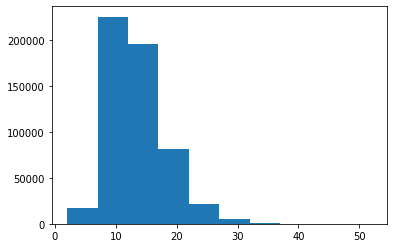

In [38]:
overall_vocabulary = set()
sentence_vocab_lengths = []
for item in df_wino['sentence1']:
    sentence_vocab = set()
    for sentence in sent_tokenize(item):
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
#             print(lemmatizer.lemmatize(word))
            sentence_vocab.add(lemmatizer.lemmatize(word))
            overall_vocabulary.add(lemmatizer.lemmatize(word))
    sentence_vocab_lengths.append(len(sentence_vocab))
    #print(sentence_vocab)
plt.hist(sentence_vocab_lengths)
plt.show()

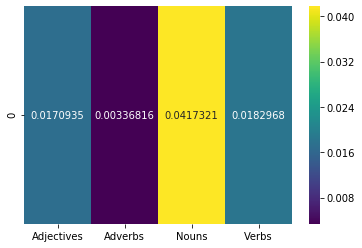

In [39]:
pos_labels = ['Verbs','Nouns','Adjectives','Adverbs']

parts_of_speech = {}

for element in pos_labels:
    if element not in parts_of_speech.keys():
        parts_of_speech[element]=[]
    
for item in df_wino['sentence2']:
    temp = {}
    temp['Verbs'], temp['Nouns'],\
    temp['Adjectives'], temp['Adverbs'] = \
    partsOfSpeechDivided(item)
    for element in temp['Verbs']:
        parts_of_speech['Verbs'].append(element)
    for element in temp['Nouns']:
        parts_of_speech['Nouns'].append(element)
    for element in temp['Adjectives']:
        parts_of_speech['Adjectives'].append(element)
    for element in temp['Adverbs']:
        parts_of_speech['Adverbs'].append(element)
heatmap_dataframe = pd.DataFrame()
heatmap_dataframe = heatmap_dataframe.append(parts_of_speech, ignore_index=True)
# can add the test as well as the dev files directly here see later
heatmap_dataframe
heatmap_dataframe = heatmap_dataframe.applymap(set)
heatmap_dataframe_lengths = heatmap_dataframe.applymap(len)
heatmap_dataframe_lengths.loc[0,:]= heatmap_dataframe_lengths.loc[0,:]/len(df_wino['sentence2'])
sns.heatmap(heatmap_dataframe_lengths, annot=True, fmt="g", cmap='viridis')
plt.show()


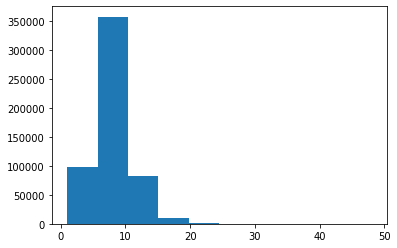

In [40]:
overall_vocabulary = set()
sentence_vocab_lengths = []
for item in df_wino['sentence2']:
    sentence_vocab = set()
    for sentence in sent_tokenize(item):
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
#             print(lemmatizer.lemmatize(word))
            sentence_vocab.add(lemmatizer.lemmatize(word))
            overall_vocabulary.add(lemmatizer.lemmatize(word))
    sentence_vocab_lengths.append(len(sentence_vocab))
    #print(sentence_vocab)
plt.hist(sentence_vocab_lengths)
plt.show()

In [24]:
words=pd.DataFrame()
frames=[df_wino['sentence1'],df_wino['sentence2']]
words['full'] = pd.concat(frames)
words.reset_index(inplace = True) 
words['casewords'] = words['full'].str.lower()
words['wsw'] = words['casewords'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
words['nopunc'] = words['wsw'].str.replace("'", "")
words['nopunc'] = words['nopunc'].str.replace(".", "")
words['nopunc'] = words['nopunc'].str.replace(",", "")
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
words['text_lemmatized'] = words.nopunc.apply(lemmatize_text)
words

index                                               full  \
0             0  A person on a horse jumps over a broken down a...   
1             1  A person on a horse jumps over a broken down a...   
2             2  A person on a horse jumps over a broken down a...   
3             3              Children smiling and waving at camera   
4             4              Children smiling and waving at camera   
...         ...                                                ...   
1100299  550147           four kids won awards for 'cleanest feet'   
1100300  550148  four homeless children had their shoes stolen,...   
1100301  550149  A man in a bodysuit is competing in a surfing ...   
1100302  550150  A man in a business suit is heading to a board...   
1100303  550151  On the beautiful blue water there is a man in ...   

                                                 casewords  \
0        a person on a horse jumps over a broken down a...   
1        a person on a horse jumps over a broken down a...   
2        a person on a horse jumps over a broken down a...   
3                    children smiling and waving at camera   
4                    children smiling and waving at camera   
...                                                    ...   
1100299           four kids won awards for 'cleanest feet'   
1100300  four homeless children had their shoes stolen,...   
1100301  a man in a bodysuit is competing in a surfing ...   
1100302  a man in a business suit is heading to a board...   
1100303  on the beautiful blue water there is a man in ...   

                                                      wsw  \
0                     person horse jumps broken airplane.   
1                     person horse jumps broken airplane.   
2                     person horse jumps broken airplane.   
3                          children smiling waving camera   
4                          children smiling waving camera   
...                                                   ...   
1100299                  four kids awards 'cleanest feet'   
1100300  four homeless children shoes stolen, feet dirty.   
1100301       man bodysuit competing surfing competition.   
1100302          man business suit heading board meeting.   
1100303        beautiful blue water man bodysuit surfing.   

                                                 nopunc  \
0                    person horse jumps broken airplane   
1                    person horse jumps broken airplane   
2                    person horse jumps broken airplane   
3                        children smiling waving camera   
4                        children smiling waving camera   
...                                                 ...   
1100299                  four kids awards cleanest feet   
1100300  four homeless children shoes stolen feet dirty   
1100301      man bodysuit competing surfing competition   
1100302         man business suit heading board meeting   
1100303       beautiful blue water man bodysuit surfing   

                                           text_lemmatized  
0                  [person, horse, jump, broken, airplane]  
1                  [person, horse, jump, broken, airplane]  
2                  [person, horse, jump, broken, airplane]  
3                         [child, smiling, waving, camera]  
4                         [child, smiling, waving, camera]  
...                                                    ...  
1100299                 [four, kid, award, cleanest, foot]  
1100300  [four, homeless, child, shoe, stolen, foot, di...  
1100301   [man, bodysuit, competing, surfing, competition]  
1100302     [man, business, suit, heading, board, meeting]  
1100303   [beautiful, blue, water, man, bodysuit, surfing]  

[1100304 rows x 6 columns]

In [25]:
#PARAMETER 1
magwords=words.wsw.str.split(expand=True).stack().value_counts()
dqic1=magwords.size/len(df_wino)
dqic1



0.10198090709476654

In [26]:
words

index                                               full  \
0             0  A person on a horse jumps over a broken down a...   
1             1  A person on a horse jumps over a broken down a...   
2             2  A person on a horse jumps over a broken down a...   
3             3              Children smiling and waving at camera   
4             4              Children smiling and waving at camera   
...         ...                                                ...   
1100299  550147           four kids won awards for 'cleanest feet'   
1100300  550148  four homeless children had their shoes stolen,...   
1100301  550149  A man in a bodysuit is competing in a surfing ...   
1100302  550150  A man in a business suit is heading to a board...   
1100303  550151  On the beautiful blue water there is a man in ...   

                                                 casewords  \
0        a person on a horse jumps over a broken down a...   
1        a person on a horse jumps over a broken down a...   
2        a person on a horse jumps over a broken down a...   
3                    children smiling and waving at camera   
4                    children smiling and waving at camera   
...                                                    ...   
1100299           four kids won awards for 'cleanest feet'   
1100300  four homeless children had their shoes stolen,...   
1100301  a man in a bodysuit is competing in a surfing ...   
1100302  a man in a business suit is heading to a board...   
1100303  on the beautiful blue water there is a man in ...   

                                                      wsw  \
0                     person horse jumps broken airplane.   
1                     person horse jumps broken airplane.   
2                     person horse jumps broken airplane.   
3                          children smiling waving camera   
4                          children smiling waving camera   
...                                                   ...   
1100299                  four kids awards 'cleanest feet'   
1100300  four homeless children shoes stolen, feet dirty.   
1100301       man bodysuit competing surfing competition.   
1100302          man business suit heading board meeting.   
1100303        beautiful blue water man bodysuit surfing.   

                                                 nopunc  \
0                    person horse jumps broken airplane   
1                    person horse jumps broken airplane   
2                    person horse jumps broken airplane   
3                        children smiling waving camera   
4                        children smiling waving camera   
...                                                 ...   
1100299                  four kids awards cleanest feet   
1100300  four homeless children shoes stolen feet dirty   
1100301      man bodysuit competing surfing competition   
1100302         man business suit heading board meeting   
1100303       beautiful blue water man bodysuit surfing   

                                           text_lemmatized  
0                  [person, horse, jump, broken, airplane]  
1                  [person, horse, jump, broken, airplane]  
2                  [person, horse, jump, broken, airplane]  
3                         [child, smiling, waving, camera]  
4                         [child, smiling, waving, camera]  
...                                                    ...  
1100299                 [four, kid, award, cleanest, foot]  
1100300  [four, homeless, child, shoe, stolen, foot, di...  
1100301   [man, bodysuit, competing, surfing, competition]  
1100302     [man, business, suit, heading, board, meeting]  
1100303   [beautiful, blue, water, man, bodysuit, surfing]  

[1100304 rows x 6 columns]

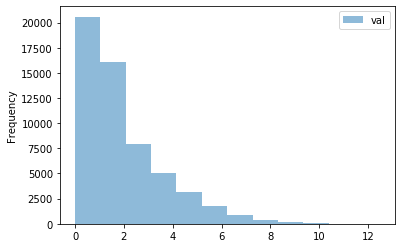

In [250]:
df=pd.DataFrame()
df['label']=magwords.index
df.label.apply(str)
df['val']=magwords.values
for i in range(magwords.size):
    df.iloc[i,1]=math.log(df.iloc[i,1])
df.plot.hist(bins=12, alpha=0.5)

In [27]:
magwords.var()

3333683.1251981677

In [64]:
 
words['final']="NaN"


In [29]:
words

index                                               full  \
0             0  A person on a horse jumps over a broken down a...   
1             1  A person on a horse jumps over a broken down a...   
2             2  A person on a horse jumps over a broken down a...   
3             3              Children smiling and waving at camera   
4             4              Children smiling and waving at camera   
...         ...                                                ...   
1100299  550147           four kids won awards for 'cleanest feet'   
1100300  550148  four homeless children had their shoes stolen,...   
1100301  550149  A man in a bodysuit is competing in a surfing ...   
1100302  550150  A man in a business suit is heading to a board...   
1100303  550151  On the beautiful blue water there is a man in ...   

                                                 casewords  \
0        a person on a horse jumps over a broken down a...   
1        a person on a horse jumps over a broken down a...   
2        a person on a horse jumps over a broken down a...   
3                    children smiling and waving at camera   
4                    children smiling and waving at camera   
...                                                    ...   
1100299           four kids won awards for 'cleanest feet'   
1100300  four homeless children had their shoes stolen,...   
1100301  a man in a bodysuit is competing in a surfing ...   
1100302  a man in a business suit is heading to a board...   
1100303  on the beautiful blue water there is a man in ...   

                                                      wsw  \
0                     person horse jumps broken airplane.   
1                     person horse jumps broken airplane.   
2                     person horse jumps broken airplane.   
3                          children smiling waving camera   
4                          children smiling waving camera   
...                                                   ...   
1100299                  four kids awards 'cleanest feet'   
1100300  four homeless children shoes stolen, feet dirty.   
1100301       man bodysuit competing surfing competition.   
1100302          man business suit heading board meeting.   
1100303        beautiful blue water man bodysuit surfing.   

                                                 nopunc  \
0                    person horse jumps broken airplane   
1                    person horse jumps broken airplane   
2                    person horse jumps broken airplane   
3                        children smiling waving camera   
4                        children smiling waving camera   
...                                                 ...   
1100299                  four kids awards cleanest feet   
1100300  four homeless children shoes stolen feet dirty   
1100301      man bodysuit competing surfing competition   
1100302         man business suit heading board meeting   
1100303       beautiful blue water man bodysuit surfing   

                                           text_lemmatized final  
0                  [person, horse, jump, broken, airplane]   NaN  
1                  [person, horse, jump, broken, airplane]   NaN  
2                  [person, horse, jump, broken, airplane]   NaN  
3                         [child, smiling, waving, camera]   NaN  
4                         [child, smiling, waving, camera]   NaN  
...                                                    ...   ...  
1100299                 [four, kid, award, cleanest, foot]   NaN  
1100300  [four, homeless, child, shoe, stolen, foot, di...   NaN  
1100301   [man, bodysuit, competing, surfing, competition]   NaN  
1100302     [man, business, suit, heading, board, meeting]   NaN  
1100303   [beautiful, blue, water, man, bodysuit, surfing]   NaN  

[1100304 rows x 7 columns]

In [ ]:
#for i in tqdm(range(len(words))):
def final(x):
    makeitastring = ' '.join(map(str, x))
    makeitastring=makeitastring.replace(",","")
    makeitastring=makeitastring.replace("'","")
    makeitastring=makeitastring.replace("[","")
    makeitastring=makeitastring.replace("]","")
    return makeitastring
for i in tqdm(range(len(words))):    
    column=['text_lemmatized']
    row=[i]
    words.loc[i,'final']=final(words.loc[i,'text_lemmatized'])


In [62]:
words

index                                               full  \
0             0  A person on a horse jumps over a broken down a...   
1             1  A person on a horse jumps over a broken down a...   
2             2  A person on a horse jumps over a broken down a...   
3             3              Children smiling and waving at camera   
4             4              Children smiling and waving at camera   
...         ...                                                ...   
1100299  550147           four kids won awards for 'cleanest feet'   
1100300  550148  four homeless children had their shoes stolen,...   
1100301  550149  A man in a bodysuit is competing in a surfing ...   
1100302  550150  A man in a business suit is heading to a board...   
1100303  550151  On the beautiful blue water there is a man in ...   

                                                 casewords  \
0        a person on a horse jumps over a broken down a...   
1        a person on a horse jumps over a broken down a...   
2        a person on a horse jumps over a broken down a...   
3                    children smiling and waving at camera   
4                    children smiling and waving at camera   
...                                                    ...   
1100299           four kids won awards for 'cleanest feet'   
1100300  four homeless children had their shoes stolen,...   
1100301  a man in a bodysuit is competing in a surfing ...   
1100302  a man in a business suit is heading to a board...   
1100303  on the beautiful blue water there is a man in ...   

                                                      wsw  \
0                     person horse jumps broken airplane.   
1                     person horse jumps broken airplane.   
2                     person horse jumps broken airplane.   
3                          children smiling waving camera   
4                          children smiling waving camera   
...                                                   ...   
1100299                  four kids awards 'cleanest feet'   
1100300  four homeless children shoes stolen, feet dirty.   
1100301       man bodysuit competing surfing competition.   
1100302          man business suit heading board meeting.   
1100303        beautiful blue water man bodysuit surfing.   

                                                 nopunc  \
0                    person horse jumps broken airplane   
1                    person horse jumps broken airplane   
2                    person horse jumps broken airplane   
3                        children smiling waving camera   
4                        children smiling waving camera   
...                                                 ...   
1100299                  four kids awards cleanest feet   
1100300  four homeless children shoes stolen feet dirty   
1100301      man bodysuit competing surfing competition   
1100302         man business suit heading board meeting   
1100303       beautiful blue water man bodysuit surfing   

                                           text_lemmatized final  
0                  [person, horse, jump, broken, airplane]   NaN  
1                  [person, horse, jump, broken, airplane]   NaN  
2                  [person, horse, jump, broken, airplane]   NaN  
3                         [child, smiling, waving, camera]   NaN  
4                         [child, smiling, waving, camera]   NaN  
...                                                    ...   ...  
1100299                 [four, kid, award, cleanest, foot]   NaN  
1100300  [four, homeless, child, shoe, stolen, foot, di...   NaN  
1100301   [man, bodysuit, competing, surfing, competition]   NaN  
1100302     [man, business, suit, heading, board, meeting]   NaN  
1100303   [beautiful, blue, water, man, bodysuit, surfing]   NaN  

[1100304 rows x 7 columns]